# Создание дашборда по пользовательским событиям для агрегатора новостей

**Задача:** Используя данные Яндекс.Дзена построить дашборд с метриками взаимодействия пользователей с карточками статей.

**Ссылка на презентацию:**
https://drive.google.com/file/d/148ASqkKWuq2uagXNQc0nQutCn6ypvPMu/view?usp=sharing

**Дашборд на Tableau Public:**
https://public.tableau.com/app/profile/sofyaak/viz/Sophia_Akinfy_project/Dashboard1?publish=yes

### Запрос к базе данных

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

query = ''' SELECT *
            FROM dash_visits
        '''

data = pd.io.sql.read_sql(query, con = engine)

In [2]:
data.head()

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


### Проверка данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


Пропущенных значений нет, тип данных корректен

In [4]:
data[['item_topic', 'source_topic', 'age_segment', 'dt', 'visits']].duplicated().sum()

0

дубликатов нет

#### Проверка столбца record_id

In [5]:
data['record_id'].nunique()

30745

Все идентификаторы уникальны, количество уникальных значений совпадает с количеством строк

#### Проверка столбца item_topic

In [6]:
data['item_topic'].value_counts()

Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
Name: item_topic, dtype: int64

Неявных дубликатов нет

#### Проверка столбца source_topic

In [7]:
data['source_topic'].value_counts()

Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                1379
Здоровье              1243
Искусство             1228
Авто                  1077
Психология            1055
Сад и дача            1036
Политика              1024
Спорт                 1007
Сделай сам             995
Ремонт                 985
Деньги                 973
Еда                    912
Интерьеры              809
Строительство          758
Музыка                 750
Технологии             741
Финансы                667
Name: source_topic, dtype: int64

Неявных дубликатов нет

#### Проверка столбца age_segment 

In [8]:
data['age_segment'].value_counts()

18-25    7056
26-30    5875
31-35    5552
36-40    5105
41-45    3903
45+      3254
Name: age_segment, dtype: int64

Неявных дубликатов нет. Пересечений нет

#### Проверка столбца dt

In [9]:
data['dt'].value_counts()

2019-09-24 18:58:00    3383
2019-09-24 18:57:00    3342
2019-09-24 18:56:00    3325
2019-09-24 18:59:00    3317
2019-09-24 18:55:00    3088
2019-09-24 19:00:00    2729
2019-09-24 18:54:00    2551
2019-09-24 18:30:00    1261
2019-09-24 18:32:00    1257
2019-09-24 18:31:00    1253
2019-09-24 18:53:00    1107
2019-09-24 18:29:00    1031
2019-09-24 18:33:00    1007
2019-09-24 18:52:00     719
2019-09-24 18:28:00     615
2019-09-24 18:34:00     576
2019-09-24 18:35:00     184
Name: dt, dtype: int64

In [10]:
data['dt'].describe()

C:\Users\Sofya\AppData\Local\Temp/ipykernel_8508/946708098.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['dt'].describe()


count                   30745
unique                     17
top       2019-09-24 18:58:00
freq                     3383
first     2019-09-24 18:28:00
last      2019-09-24 19:00:00
Name: dt, dtype: object

В датасете данные за 32 минуты

#### Проверка столбца visits

In [11]:
data['visits'].describe()

count    30745.000000
mean        10.089673
std         19.727601
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        371.000000
Name: visits, dtype: float64

<AxesSubplot:>

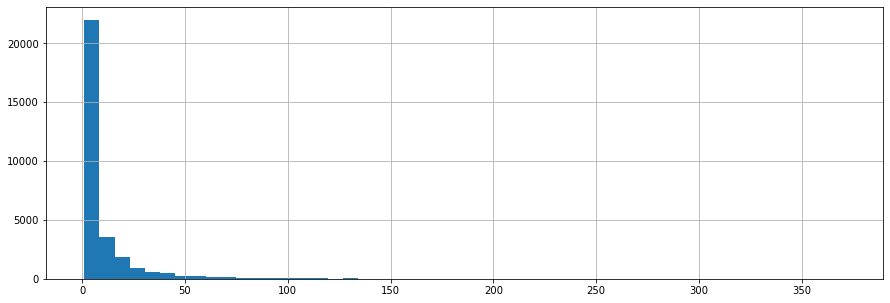

In [12]:
data['visits'].hist(bins=50, figsize=(15, 5))

In [13]:
np.percentile(data['visits'], [95, 99])

array([42., 95.])

Есть выбросы до 371, 95% значений расположены до 42

<b> Вывод: пропусков и дубликатов нет, тип данных корректен. Выбросы в столбце 'visits'. Данные не требуют обработки. Таблица оставлена для анализа без изменений.</b>

### Экспорт данных в csv-файл

In [14]:
data.to_csv('data.csv', index=False)

In [15]:
test = pd.read_csv('data.csv')
test

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
...,...,...,...,...,...,...
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1
